IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [2]:
import asyncio
import nest_asyncio
import aiohttp
from understat import Understat
import requests
import codecs
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [3]:
club="Werder Bremen"

In [4]:
with open('club_name.txt', 'w') as f:
    f.write(club)
    f.close

In [5]:
team_for_foto=""
if club == "RasenBallsport Leipzig":
    team_for_foto="RB Leipzig"
else:
    team_for_foto=club
team_for_foto

'Werder Bremen'

In [6]:
torneo="2025-2026"

In [7]:
%run -i undesstatteams.py

Werder Bremen
[
    {
        "id": "30228",
        "isResult": true,
        "side": "a",
        "h": {
            "id": "132",
            "title": "Eintracht Frankfurt",
            "short_title": "EIN"
        },
        "a": {
            "id": "123",
            "title": "Werder Bremen",
            "short_title": "WER"
        },
        "goals": {
            "h": "4",
            "a": "1"
        },
        "xG": {
            "h": "3.10684",
            "a": "0.587822"
        },
        "datetime": "2025-08-23 13:30:00",
        "forecast": {
            "w": 0.8625256246233468,
            "d": 0.09569696366122281,
            "l": 0.04177638521143569
        },
        "result": "l"
    },
    {
        "id": "30236",
        "isResult": true,
        "side": "h",
        "h": {
            "id": "123",
            "title": "Werder Bremen",
            "short_title": "WER"
        },
        "a": {
            "id": "119",
            "title": "Bayer Leverkusen",
      

In [8]:
#Get csv from D://understatteams.py
df_understat=pd.read_csv(f'{club}_seasons_shots.csv')

In [9]:
df_understat.head()

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
0,1,0.828,0.626,Romano Schmid,RightFoot,BlockedShot,Eintracht Frankfurt,Werder Bremen,Marco Grüll,0.059334
1,1,0.852,0.636,Marco Grüll,RightFoot,SavedShot,Eintracht Frankfurt,Werder Bremen,NaN,0.047479
2,12,0.729,0.356,Marco Grüll,RightFoot,SavedShot,Eintracht Frankfurt,Werder Bremen,NaN,0.045168
3,27,0.905,0.378,Samuel Mbangula,RightFoot,MissedShots,Eintracht Frankfurt,Werder Bremen,Romano Schmid,0.267063
4,39,0.725,0.677,Felix Agu,RightFoot,SavedShot,Eintracht Frankfurt,Werder Bremen,NaN,0.007489


In [10]:
own_goals_total=len(df_understat[df_understat['result']=='OwnGoal'])
own_goals_total

1

In [11]:
own_goals=df_understat[df_understat['result']=='OwnGoal']
own_goals['xG']=0.5
own_goals

C:\Users\enado\AppData\Local\Temp\ipykernel_13212\1559663483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  own_goals['xG']=0.5


,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
45,74,0.017,0.482,Karim Coulibaly,LeftFoot,OwnGoal,Werder Bremen,Freiburg,NaN,0.5


In [12]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_league_players(
            "bundesliga",
            2025,
            team_title=club
        )
        squad=json.dumps(players, indent=4, ensure_ascii=False)
    with codecs.open(f'{club}_squad.json', "w", "utf-8") as jsonfile:
        jsonfile.write(squad)
        #json.dumps(jamal_json, indent=4)
        jsonfile.close() 

nest_asyncio.apply()
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

squad_df=pd.read_json(f'{club}_squad.json')

In [13]:
squad=squad_df['player_name'].unique()
squad

array(['Jens Stage', 'Romano Schmid', 'Justin Njinmah', 'Samuel Mbangula',
       'Marco Grüll', 'Karim Coulibaly', 'Isaac Schmidt',
       'Leonardo Bittencourt', 'Niklas Stark', 'Marco Friedl',
       'Amos Pieper', 'Felix Agu', 'Karl Hein', 'Keke Maximilian Topp',
       'Senne Lynen', 'Victor Boniface', 'Skelly Alvero',
       'Julián Malatini', 'Isak Hansen-Aaröen', 'Yukinari Sugawara',
       'Mio Backhaus', 'Patrice Covic', 'Cameron Puertas'], dtype=object)

In [14]:
"Paul Nebel" in squad

False

In [15]:
own_goals_len=len(own_goals[~own_goals['player'].isin(squad)])
own_goals_len

0

In [16]:
ogf=own_goals[~own_goals['player'].isin(squad)]
ogf

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [17]:
own_goals_for=0
for player in own_goals['player']:
    if player not in squad:
        own_goals_for+=1
own_goals_for

0

In [18]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

#df_understat['result'].unique()

In [19]:
#df_understat[df_understat['result']=='OwnGoal']

In [20]:
#pip install mplsoccer
#pip install highlight-text

In [21]:
from highlight_text import ax_text,fig_text
from mplsoccer import (VerticalPitch, Pitch)

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [23]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Bahnschrift'
mpl.rcParams['legend.fontsize'] = 12


In [24]:
#mpl.font_manager.FontManager.get_font_names(mpl)

In [25]:
import numpy as np

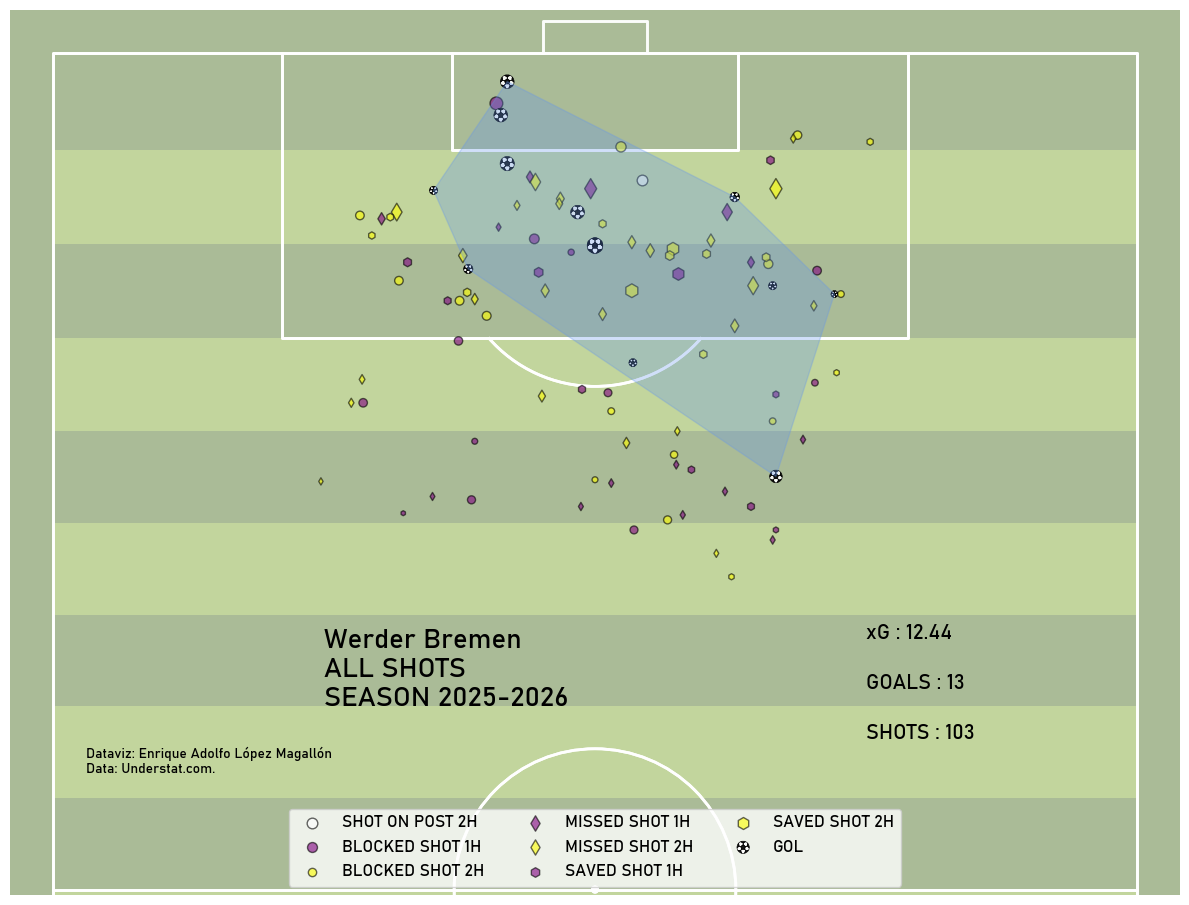

In [26]:
# SETTING UP THE AXES
#fig, ax = plt.subplots(figsize=(10,12))
#ax.axis('off')
#fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST TEAM
pitch = pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line 
    half=True,  # half of a pitch
    goal_type='box',
    goal_alpha=0.8, 
    pitch_type='opta',
    pitch_color='#aabb97',
    stripe=True,
    stripe_color='#c2d59d',
    line_color='white')  

fig, ax = pitch.draw(figsize=(12, 10))

#PLOTTING HTEAM
#df_fil = df_understat.loc[df_understat['HomeAway']=='h']
df_fil = df_understat
#df_hOG = df_fil[df_fil['HomeAway']=='a']
#df_fil = df_a
#df_hOG = df_fil[df_fil['HomeAway']=='h']
df_h1H = df_fil[df_fil['minute']<=45]
df_h2H = df_fil[df_fil['minute']>45]

#PLOTTING SHOTS TEAM 1 PER TYPE AND HALF.LABELS APPEAR ONLY IF VARIABLE IS FILLED


if "ShotOnPost" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='ShotOnPost']['X'],df_h1H[df_h1H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 1H")

if "ShotOnPost" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='ShotOnPost']['X'],df_h2H[df_h2H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 2H")
    
if "BlockedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='BlockedShot']['X'],df_h1H[df_h1H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="BLOCKED SHOT 1H")

if "BlockedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='BlockedShot']['X'],df_h2H[df_h2H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="BLOCKED SHOT 2H")

if "MissedShots" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='MissedShots']['X'],df_h1H[df_h1H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="MISSED SHOT 1H")

if "MissedShots" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='MissedShots']['X'],df_h2H[df_h2H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="MISSED SHOT 2H")
    
if "SavedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='SavedShot']['X'],df_h1H[df_h1H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="SAVED SHOT 1H")

if "SavedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='SavedShot']['X'],df_h2H[df_h2H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="SAVED SHOT 2H")
    


#NOW PLOTTING THE GOALS
if "Goal" in iter(df_fil['result']):
    pitch.scatter(df_fil[df_fil['result']=='Goal']['X'],df_fil[df_fil['result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xG'])*150, marker='football', alpha=0.9,
              edgecolors='black', facecolor='red', ax=ax, label="GOL")
    hull=pitch.convexhull(df_fil[df_fil['result']=='Goal']['X'], df_fil[df_fil['result']=='Goal']['Y'])
    pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)

if "OwnGoal" in iter(ogf['result']):
    pitch.scatter(100-ogf[ogf['result']=='OwnGoal']['X']*100,100-ogf[df_fil['result']=='OwnGoal']['Y']*100, 
              s=np.sqrt(ogf[ogf['result']=='OwnGoal']['xG'])*150, marker='x', alpha=0.9,
              edgecolors='red', facecolor='red', ax=ax, label="OWN GOAL FOR")
    #hull=pitch.convexhull(df_fil[df_fil['result']=='OwnGoal']['X'], df_fil[df_fil['result']=='OwnGoal']['Y'])
    #pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
#OWNGOALS
#if len(df_hOG) >0:
 #   pitch.scatter(df_hOG[df_hOG['result']=='Goal']['X'],df_hOG[df_hOG['result']=='Goal']['Y'], 
  #            s=np.sqrt(df_hOG[df_hOG['result']=='Goal']['xG'])*150, marker='x', alpha=0.9,
   #           edgecolors='black', facecolor='orange', ax=ax_opta1, label='AUTOGOL DEL RIVAL')


# ADDING THE LEGEND
ax.legend(loc='lower center', ncol=3)#.get_texts()[0].set_color("black")

ax.text(25,62,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])+ int(own_goals_for)), weight='bold', size=15)
#ax.text(25,62,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])), weight='bold', size=15)
ax.text(25,65,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax.text(25,59,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax.text(75, 61, f'{team_for_foto}\nALL SHOTS\nSEASON {torneo}', weight='bold', size=20)



pitch.draw(ax=ax)

# ADDING A FOOTER
ax.text(97,57,'Dataviz: Enrique Adolfo López Magallón\nData: Understat.com.')# Comparison with <forwards>'+
 #       ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
  #      size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')

#EXPORT TO IMG

plt.savefig(f'{club}_shots.png',dpi=300,facecolor=background)

In [27]:
df_fil[df_fil['result']=='Goal']

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
6,47,87.099998,61.700001,Justin Njinmah,RightFoot,Goal,Eintracht Frankfurt,Werder Bremen,Marco Grüll,0.099053
12,43,88.500000,50.000000,Romano Schmid,RightFoot,Goal,Werder Bremen,Bayer Leverkusen,NaN,0.757777
17,75,74.699997,33.299999,Isaac Schmidt,LeftFoot,Goal,Werder Bremen,Bayer Leverkusen,Keke Maximilian Topp,0.331164
21,93,96.300003,58.700001,Karim Coulibaly,LeftFoot,Goal,Werder Bremen,Bayer Leverkusen,NaN,0.470915
23,14,86.099998,33.599998,Samuel Mbangula,RightFoot,Goal,Borussia M.Gladbach,Werder Bremen,Yukinari Sugawara,0.058364
24,25,91.400002,37.099998,Jens Stage,RightFoot,Goal,Borussia M.Gladbach,Werder Bremen,Samuel Mbangula,0.111183
33,73,88.500000,50.000000,Romano Schmid,RightFoot,Goal,Borussia M.Gladbach,Werder Bremen,NaN,0.757777
34,80,93.400002,58.099998,Justin Njinmah,RightFoot,Goal,Borussia M.Gladbach,Werder Bremen,Victor Boniface,0.541515
56,1,81.500000,46.500000,Samuel Mbangula,RightFoot,Goal,Werder Bremen,St. Pauli,NaN,0.052524
75,49,98.300003,58.099998,Marco Grüll,LeftFoot,Goal,FC Heidenheim,Werder Bremen,Romano Schmid,0.463079
